# `clust-learn` - Module 3: Clustering 聚类

This guide shows how to use the `clustering` module of the `clust-learn` package to compute and explain clusters.

本指南展示了如何使用clust-learn包中的clustering模块来计算和解释聚类。

## 0. Setup

In [1]:
import numpy as np
import pandas as pd

from clearn.clustering import Clustering
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## 1. Data loading

DataFrame with extracted dimensions.

提取降维后的数据框。

In [2]:
df = pd.read_csv('data_HKG/data_香港_modified_preprocessed_dim_red_output.csv')
print(df.shape)
df.head()

(3209, 25)


dim_01  dim_02  dim_03  dim_04  dim_05  dim_06  dim_07  dim_08  dim_09  \
0  0.2323  6.0567 -0.6387  1.0679 -0.4819 -2.0503 -1.1319  0.5354 -1.9395   
1  1.5321  0.2111  1.9729  1.2158 -0.8704 -2.0246 -1.1237  0.4424 -1.9501   
2  0.2232  0.0182  1.3338  1.0712  1.2325 -2.0798 -1.2392  0.5367 -1.9383   
3  0.8200 -2.8954 -0.0639  1.0719 -0.3445 -2.1334 -1.1609  0.5842 -1.9511   
4 -0.6915 -2.1591 -0.6350  0.9592 -0.3262 -2.1713 -1.1484  0.5942 -1.9264   

   dim_10  dim_11  dim_12  dim_13  dim_14  dim_15  dim_16  dim_17  dim_18  \
0 -0.0809 -0.1618  0.0360  0.0353  0.3677  0.3305  0.0194 -0.3287  0.3629   
1 -0.1809 -0.1744  0.0359  0.0557  0.3366  0.3225  0.0358 -0.3170  0.3671   
2  0.2670 -0.1711  0.0208  0.0017  0.3843  0.2972 -0.0295 -0.3680  0.3750   
3  1.3948 -0.1759  0.0435  0.1154  0.2863  0.3547  0.1047 -0.2963  0.3739   
4 -1.3769 -0.1615  0.0379  0.0871  0.3414  0.3598  0.0600 -0.3046  0.3361   

   dim_19  dim_20  dim_21  dim_22  dim_23  dim_24  dim_25  
0  0.0740 -0.0612  0.0301 -0.0846 -0.0203 -0.3985  0.0835  
1  0.0569 -0.0738  0.0114 -0.0553  0.0107 -0.3587  0.0726  
2  0.0277 -0.0668  0.0006 -0.0545 -0.0229 -0.3831  0.0607  
3  0.1053 -0.0717  0.0235 -0.0576  0.0161 -0.3906  0.0726  
4  0.0588 -0.0531  0.0217 -0.0430 -0.0167 -0.3873  0.0879

DataFrame with original variables. This will later be used for results interpretation.

包含原始变量的数据框。这将在稍后用于结果解释。


In [3]:
df_original = pd.read_csv('data_HKG/data_香港_modified_preprocess_ouput.csv')
print(df_original.shape)
df_original.head()

(3209, 275)


ASDAGE   ASRREA   ASRLIT   ASRINF   ASRIIE   ASRRSI  ASBGSEC  ASBGSSB  \
0 10.1700 613.7176 584.1126 594.4882 585.1696 569.7780   8.1270   8.2377   
1  9.5000 627.7358 605.0685 615.8848 615.8552 627.4384   9.5116  12.8526   
2  9.6700 587.8333 580.8346 588.4126 588.7882 608.0009   9.0079   9.8208   
3  9.5800 597.4140 608.5653 622.6152 606.0006 589.1121   8.3421  12.8526   
4 10.2500 567.7006 556.6952 593.9863 551.5111 559.6765   9.2502   8.2377   

   ASBGSB  ASBGERL  ASBGDRL  ASBGSLR  ASBGSCR  ASBGHRL  ASBHSES  ASBHELA  \
0 10.9650   8.0515   9.0042  11.3015   9.3996  10.5434   9.6545  14.7746   
1  9.5287  11.5482   9.6066  10.8361  10.2898  10.1459   9.9139   8.9179   
2  9.5287  10.6601  10.9865  12.8620  10.9057  13.0465  11.1716  10.2674   
3 12.5675   8.5445  10.2180   8.0459   8.7269  10.2224  10.3472   6.1700   
4 10.9650   8.2854   5.9224  10.4598   9.8041   9.9153   9.6545   8.0567   

   ASBHENA  ASBHELN  ASBHELT  ASBHPCS  ASBHPLR   ACBG09  ACBG15  ACBG16  \
0  15.0187  15.9154  12.7988  12.1320   8.6708 200.0000  1.0000  1.0000   
1  10.0490   9.4343  13.9199  12.1320   8.2504 200.0000  1.0000  1.0000   
2   9.2144   9.6560  10.4454  12.1320   8.4594 200.0000  1.0000  1.0000   
3   7.9977   7.0296  10.4454   9.5249   8.4594 200.0000  1.0000  1.0000   
4   8.4075   8.1484   8.7284   7.9121   8.0424 200.0000  1.0000  1.0000   

   ACBGRRS  ACBGEAS  ACBGDAS  ACDGTIHY  ATBG01  ATBR01A  ATBR01B  ATBR02A  \
0   7.3719   9.4049   9.9283  791.6667 25.0000  33.0000  33.0000   0.0000   
1   7.3719   9.4049   9.9283  791.6667 25.0000  33.0000  33.0000   0.0000   
2   7.3719   9.4049   9.9283  791.6667 25.0000  33.0000  33.0000   0.0000   
3   7.3719   9.4049   9.9283  791.6667 25.0000  33.0000  33.0000   0.0000   
4   7.3719   9.4049   9.9283  791.6667 25.0000  33.0000  33.0000   0.0000   

   ATBR02B  ATBGEAS  ATBGSOS  ATBGTJS  ATBGSLI  ATDGLIHY  ATDGRIHY  ITSEX  \
0   0.0000   8.8396   9.4260   8.6795   7.5232  171.0000  133.0000      1   
1   0.0000   8.8396   9.4260   8.6795   7.5232  171.0000  133.0000      2   
2   0.0000   8.8396   9.4260   8.6795   7.5232  171.0000  133.0000      2   
3   0.0000   8.8396   9.4260   8.6795   7.5232  171.0000  133.0000      1   
4   0.0000   8.8396   9.4260   8.6795   7.5232  171.0000  133.0000      1   

   ASRIBM  ASBG03  ASBG05A  ASBG05B  ASBG05E  ASBG05F  ASBG05G  ASBG05H  \
0       4       2        1        1        1        2        2        2   
1       5       1        1        1        2        1        1        1   
2       4       4        1        1        2        1        2        1   
3       4       1        1        2        1        2        2        2   
4       4       3        1        2        2        1        2        2   

   ASBG05I  ASBG05J  ASBG05K  ASBG06  ASBG07A  ASBG07B  ASBG08A  ASBG08B  \
0        1        1        2       4        3        2        2        2   
1        2        2        2       5        3        3        2        2   
2        2        2        2       5        3        4        2        2   
3        1        2        2       5        3        4        2        2   
4        1        1        2       5        1        1        2        2   

   ASBG10F  ASBR03A  ASBR03B  ASBR03C  ASBR04  ASBR05  ASDGSEC  ASDGSSB  \
0        2        1        3        4       2       2        3        2   
1        1        2        2        3       1       2        2        1   
2        1        1        1        1       1       4        2        1   
3        1        2        2        4       2       1        3        1   
4        1        1        1        4       1       2        2        2   

   ASDGSB  ASDGERL  ASDGDRL  ASDGSLR  ASDGSCR  ASDG05S  ASBH02A  ASBH02B  \
0       1        2        2        1        2        2        1        1   
1       1        1        2        1        1        2        1        1   
2       1        1        2        1        1        3        1        1   
3       1        2        2        3        2    

We separate numerical and categorical variables from the original set of variables.

我们从原始变量集中分离数值变量和分类变量。


In [4]:
num_vars = ['ASDAGE', 'ASRREA', 'ASRLIT', 'ASRINF', 'ASRIIE', 'ASRRSI', 'ASBGSEC', 'ASBGSSB', 'ASBGSB', 'ASBGERL', 'ASBGDRL', 'ASBGSLR', 'ASBGSCR', 'ASBGHRL', 'ASBHSES', 'ASBHELA', 'ASBHENA', 'ASBHELN', 'ASBHELT', 'ASBHPCS', 'ASBHPLR', 'ACBG09', 'ACBG15', 'ACBG16', 'ACBGRRS', 'ACBGEAS', 'ACBGDAS', 'ACDGTIHY', 'ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
cat_vars = ['ITSEX', 'ASRIBM', 'ASBG03', 'ASBG05A', 'ASBG05B', 'ASBG05E', 'ASBG05F', 'ASBG05G', 'ASBG05H', 'ASBG05I', 'ASBG05J', 'ASBG05K', 'ASBG06', 'ASBG07A', 'ASBG07B', 'ASBG08A', 'ASBG08B', 'ASBG10F', 'ASBR03A', 'ASBR03B', 'ASBR03C', 'ASBR04', 'ASBR05', 'ASDGSEC', 'ASDGSSB', 'ASDGSB', 'ASDGERL', 'ASDGDRL', 'ASDGSLR', 'ASDGSCR', 'ASDG05S', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH03B', 'ASBH03C', 'ASBH03D', 'ASBH03E', 'ASBH04', 'ASBH06', 'ASBH07F', 'ASBH09', 'ASBH14A', 'ASBH14B', 'ASBH14C', 'ASBH16', 'ASBH18AA', 'ASBH18AB', 'ASBH18BA', 'ASBH18BB', 'ASBH18CA', 'ASBH18CB', 'ASBH18DA', 'ASBH18DB', 'ASBH18EA', 'ASBH18EB', 'ASBH19', 'ASBH20A', 'ASBH20B', 'ASBH20C', 'ASBH21A', 'ASBH21B', 'ASBH21C', 'ASBH21D', 'ASBH22', 'ASDGHRL', 'ASDHSES', 'ASDHELA', 'ASDHENA', 'ASDHELN', 'ASDHELT', 'ASDHPCS', 'ASDHPLR', 'ASDHAPS', 'ASDHEDUP', 'ASDHOCCP', 'ACBG04', 'ACBG05A', 'ACBG05B', 'ACBG07B', 'ACBG07C', 'ACBG08', 'ACBG13', 'ACBG14A', 'ACBG14B', 'ACBG14C', 'ACBG14D', 'ACBG14E', 'ACBG14F', 'ACBG14G', 'ACBG14H', 'ACBG14I', 'ACBG14J', 'ACBG14K', 'ACBG14L', 'ACBG14M', 'ACBG14N', 'ACBG17', 'ACBG18A', 'ACBG18B', 'ACBG18C', 'ACBG19', 'ACBG20', 'ACBG21A', 'ACBG21B', 'ACBG21C', 'ACBG21D', 'ACBG21E', 'ACBG21F', 'ACDGRRS', 'ACDGEAS', 'ACDGDAS', 'ACDGSBC', 'ATBG02', 'ATBG03', 'ATBG05AA', 'ATBG05AB', 'ATBG05AC', 'ATBG05AD', 'ATBG05BA', 'ATBG05BB', 'ATBG05BC', 'ATBG05BD', 'ATBG05BE', 'ATBG05BF', 'ATBG05BG', 'ATBG05BH', 'ATBG05BI', 'ATBG05BJ', 'ATBG05BK', 'ATBG06', 'ATBG07AA', 'ATBG07BA', 'ATBG07AB', 'ATBG07BB', 'ATBG07AC', 'ATBG07BC', 'ATBG07AD', 'ATBG07BD', 'ATBG07AE', 'ATBG07BE', 'ATBG07AF', 'ATBG07BF', 'ATBG07AG', 'ATBG07BG', 'ATBG08A', 'ATBG08B', 'ATBG08C', 'ATBG08D', 'ATBG08E', 'ATBG09A', 'ATBG09B', 'ATBG09C', 'ATBG09D', 'ATBR06A', 'ATBR06B', 'ATBR06C', 'ATBR06D', 'ATBR06E', 'ATBR07AA', 'ATBR07AB', 'ATBR07AC', 'ATBR07AD', 'ATBR07BA', 'ATBR07BB', 'ATBR07BC', 'ATBR07BD', 'ATBR08A', 'ATBR08B', 'ATBR08C', 'ATBR08D', 'ATBR08E', 'ATBR08F', 'ATBR08G', 'ATBR08H', 'ATBR09A', 'ATBR09B', 'ATBR09C', 'ATBR09D', 'ATBR09E', 'ATBR09F', 'ATBR09G', 'ATBR09H', 'ATBR09I', 'ATBR10A', 'ATBR10B', 'ATBR10C', 'ATBR10D', 'ATBR10E', 'ATBR10F', 'ATBR10G', 'ATBR10H', 'ATBR10I', 'ATBR10J', 'ATBR10K', 'ATBR10L', 'ATBR11A', 'ATBR11B', 'ATBR11C', 'ATBR11D', 'ATBR11E', 'ATBR12A', 'ATBR12BA', 'ATBR12BB', 'ATBR12BC', 'ATBR12BD', 'ATBR12C', 'ATBR12DA', 'ATBR12DB', 'ATBR12DC', 'ATBR12EA', 'ATBR12EB', 'ATBR12EC', 'ATBR12ED', 'ATBR12EE', 'ATBR13A', 'ATBR13B', 'ATBR13C', 'ATBR13D', 'ATBR13E', 'ATBR14', 'ATBR15', 'ATBR16', 'ATBR17A', 'ATBR17B', 'ATBR17C', 'ATBR18A', 'ATBR18B', 'ATBR18C', 'ATBR18D', 'ATBR18E', 'ATBR19', 'ATDGEAS', 'ATDGSOS', 'ATDGTJS', 'ATDGSLI']

We make a selection of the original variables for some visualizations.
我们选择了一些原始变量来进行可视化。


In [5]:
num_vars_sel=['ASDAGE', 'ASRREA', 'ASRLIT', 'ASRINF', 'ASRIIE', 'ASRRSI', 'ASBGSEC', 'ASBGSSB', 'ASBGSB', 
              'ASBGERL', 'ASBGDRL', 'ASBGSLR', 'ASBGSCR', 'ASBGHRL', 'ASBHSES', 'ASBHELA', 'ASBHENA', 
              'ASBHELN', 'ASBHELT', 'ASBHPCS', 'ASBHPLR', 'ACBG09', 'ACBG15', 'ACBG16', 'ACBGRRS', 'ACBGEAS',
             'ACBGDAS', 'ACDGTIHY', 'ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBGEAS', 'ATBGSOS', 
             'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']

## 1. Clustering computation 聚类计算


We compare k-means, agglomerative clustering with Ward's linkage, and Gaussian Mixture models. We don't normalize the data (`normalize=False`) because we're using the components extracted from the dimensionality reduction process.

我们比较了k-means、具有Ward链接的凝聚聚类以及高斯混合模型。我们没有对数据进行标准化（`normalize=False`），因为我们使用的是从降维过程中提取的成分。


In [6]:
km = KMeans(random_state=42)
ward = AgglomerativeClustering()
gmm = GaussianMixture()

In [7]:
# 创建三种聚类算法实例，并通过Clustering类封装数据。
# K均值适合球形簇，层次聚类适合层级结构，高斯混合模型适合复杂分布。
cl = Clustering(df, algorithms= [km, ward, gmm], normalize=False)

In [8]:
cl.df.describe()

dim_01    dim_02    dim_03    dim_04    dim_05    dim_06    dim_07  \
count 3209.0000 3209.0000 3209.0000 3209.0000 3209.0000 3209.0000 3209.0000   
mean     0.0000    0.0000    0.0000   -0.0000   -0.0000    0.0000   -0.0000   
std      2.1972    1.6917    1.5483    1.5181    1.4668    1.3696    1.3386   
min     -9.2518   -6.2473   -6.2721   -5.0845   -4.6937   -3.1286   -3.4155   
25%     -1.2323   -1.1031   -1.0387   -1.1632   -0.9991   -0.8879   -0.9184   
50%      0.2135   -0.1578   -0.1671   -0.0700   -0.0638   -0.1870   -0.0717   
75%      1.4912    0.9688    0.9697    1.0304    0.9900    0.8348    1.1371   
max      5.8833    6.8401    4.9353    3.5615    4.4140    5.3426    2.8407   

         dim_08    dim_09    dim_10    dim_11    dim_12    dim_13    dim_14  \
count 3209.0000 3209.0000 3209.0000 3209.0000 3209.0000 3209.0000 3209.0000   
mean    -0.0000    0.0000    0.0000    0.0000   -0.0000   -0.0000    0.0000   
std      1.2363    1.1377    1.1284    0.2721    0.2187    0.1944    0.1934   
min     -4.0842   -5.2769   -4.3338   -0.6232   -0.4840   -0.4932   -0.4035   
25%     -0.7292   -0.6682   -0.7697   -0.2044   -0.1566   -0.1349   -0.1290   
50%      0.2057    0.0807   -0.0236   -0.0333   -0.0081   -0.0039   -0.0177   
75%      0.8253    0.7025    0.7920    0.2000    0.1464    0.1203    0.0937   
max      2.4559    3.4139    3.4650    0.8390    0.6582    1.0158    1.1089   

         dim_15    dim_16    dim_17    dim_18    dim_19    dim_20    dim_21  \
count 3209.0000 3209.0000 3209.0000 3209.0000 3209.0000 3209.0000 3209.0000   
mean    -0.0000    0.0000    0.0000   -0.0000    0.0000    0.0000   -0.0000   
std      0.1868    0.1818    0.1752    0.1677    0.1663    0.1639    0.1629   
min     -0.4643   -0.5663   -0.5631   -0.3696   -0.5204   -0.4514   -0.4229   
25%     -0.1254   -0.1269   -0.0928   -0.1095   -0.1008   -0.0970   -0.1000   
50%      0.0057    0.0029    0.0033   -0.0127   -0.0114   -0.0124   -0.0105   
75%      0.1092    0.1196    0.0930    0.0789    0.0918    0.1020    0.0752   
max      0.5503    0.5759    0.6435    0.9015    0.8455    0.6499    0.7014   

         dim_22    dim_23    dim_24    dim_25  
count 3209.0000 3209.0000 3209.0000 3209.0000  
mean    -0.0000    0.0000    0.0000   -0.0000  
std      0.1604    0.1583    0.1567    0.1517  
min     -0.4455   -0.5056   -0.4472   -0.5124  
25%     -0.0966   -0.0946   -0.0877   -0.0811  
50%     -0.0159   -0.0003   -0.0122    0.0069  
75%      0.0907    0.0904    0.0924    0.0883  
max      0.6390    0.6355    0.7170    0.6132

The code below computes the optimal number of clusters between 2 and 21 and adds the prefict `'STU'` (from the word student) to the cluster labels.

以下代码计算了在2到21之间的最优聚类数，并在聚类标签前添加了前缀'STU'（来自单词“teacher”）。

As performance metric teh default one is used (WSS or inertia - `metric='inertia'`).

作为性能指标，默认使用了WSS或惯性（metric='inertia'）。

In [9]:
# 在2到21个聚类范围内寻找最优聚类数，并为聚类标签添加前缀STU。
# 返回每个样本的聚类标签。
cl.compute_clusters(max_clusters = 21, prefix='STU')

array([0, 2, 2, ..., 2, 5, 5], dtype=int32)

In [10]:
# 在调用 plot_score_comparison 前转换标签类型
cl.df['cluster'] = cl.df['cluster'].astype(int)


In [11]:
# 存储三个聚类模型的评分或评估指标。
cl.scores_

{'KMeans(random_state=42)': [np.float64(73174.17169794362),
  np.float64(61277.867507132134),
  np.float64(56822.39029465214),
  np.float64(53974.70062049368),
  np.float64(51503.11013716852),
  np.float64(49692.29032680475),
  np.float64(48317.73957554907),
  np.float64(46760.5269037883),
  np.float64(45695.332121851825),
  np.float64(44631.97429843509),
  np.float64(43730.059375024546),
  np.float64(43071.96877199832),
  np.float64(41821.520141769994),
  np.float64(41294.73477938399),
  np.float64(40412.57228826532),
  np.float64(39757.89166348662),
  np.float64(39171.92877083322),
  np.float64(38762.46097598256),
  np.float64(38168.33290981787),
  np.float64(37805.19944023148),
  np.float64(37928.82173204601)],
 'AgglomerativeClustering()': [np.float64(73174.17169794362),
  np.float64(64632.54441792704),
  np.float64(61337.22887401846),
  np.float64(59112.233079035155),
  np.float64(57125.78113958947),
  np.float64(55267.899355941816),
  np.float64(53587.26127747472),
  np.float64(5

In [12]:
# 存储聚类模型对数据点的聚类标签（cluster labels）。这些标签表示每个数据点被分配到的聚类编号。
cl.labels_

array([0, 2, 2, ..., 2, 5, 5], dtype=int32)

In [13]:
# 存储聚类模型的评估指标或度量方法。这些指标或方法用于衡量聚类结果的质量或描述聚类的特性。
# Inertia 表示所有数据点到其所属聚类中心的欧几里得距离的平方和
cl.metric_

'inertia'

In [14]:
# 最优配置（算法、聚类数、评分）
print("最优配置（算法、聚类数、评分）\n", cl.optimal_config_)

最优配置（算法、聚类数、评分）
 ('KMeans(random_state=42)', np.int64(6), np.float64(49692.29032680475))


## 2. Cluster performance 聚类性能可视化


The code below generates a bar plot with the number of observations per cluster.

以下代码生成了一个条形图，显示了每个聚类中的观测值数量。

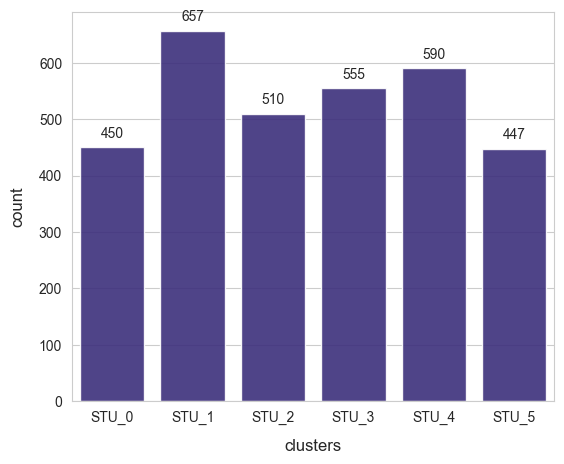

In [15]:
# 绘制每个聚类的样本数量的条形图。
cl.plot_clustercount() #output_path='PATH.jpg')


# # 绘制每个聚类的观测数  # 聚类结果可视化
# # Plot number of observations per cluster
# cl.plot_clustercount(output_path=os.path.join("img_MAC", "聚类数量分布图cluster_count.jpg"))
# print("已完成聚类数量分布图的生成。")

The code below generates a plot with the performance comparison between kmeans and aggomerative clustering.

以下代码生成了一个比较k-means聚类和凝聚聚类性能的图表。

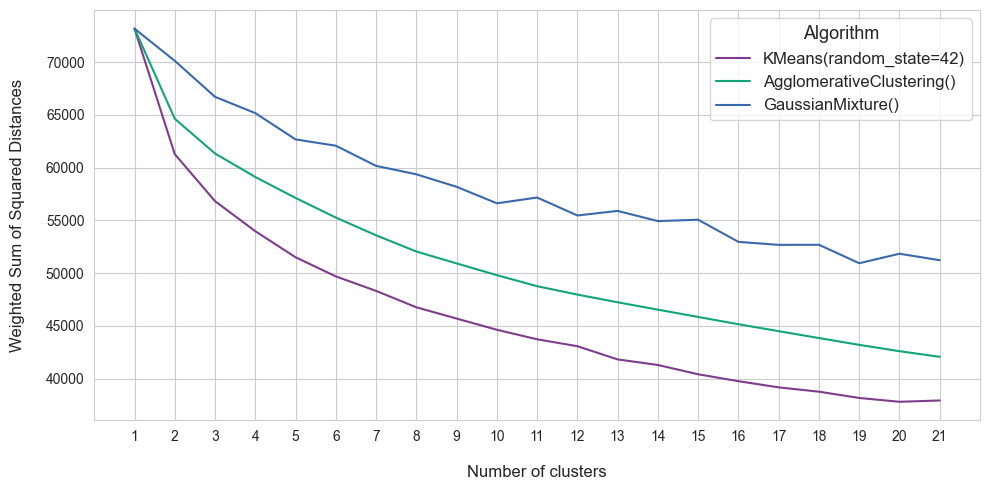

In [16]:
# # 横轴（Number of clusters）：表示聚类的数量，从 1 到 21。
# # 纵轴（Weighted Sum of Squared Distances）：表示加权平方距离（Weighted Sum of Squared Distances），值越小表示聚类效果越好
# cl.plot_score_comparison(output_path=os.path.join("img_MAC", "聚类算法性能的图表performance_comparison.jpg"))
# print("已完成聚类算法性能的图表的生成。")

cl.plot_score_comparison()

# 横轴（Number of clusters）：表示聚类的数量，从 1 到 21。
# 纵轴（Weighted Sum of Squared Distances）：表示加权平方距离（Weighted Sum of Squared Distances），值越小表示聚类效果越好

The code below plots the normalized WSS and difference curve used by the elbow method.

以下代码绘制了用于肘部法则的标准化WSS（总平方和）和差分曲线。

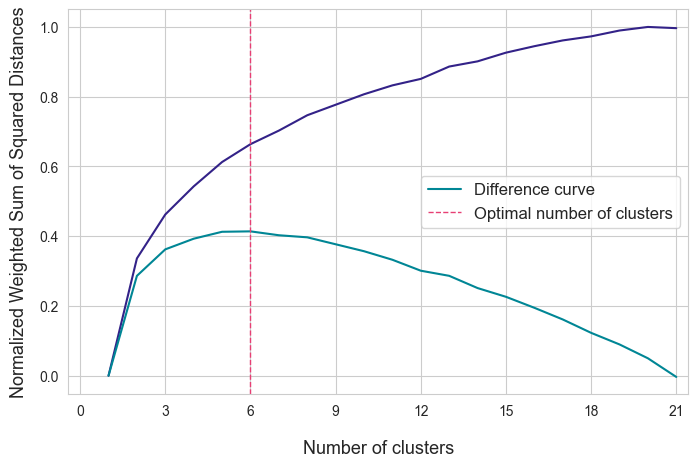

In [17]:
# 绘制肘部法则的标准化 WSS 和差分曲线。
cl.plot_optimal_components_normalized() #output_path='PATH.jpg')


# # 绘制肘部法则用于选择最优 k 的标准化 WSS 曲线  # 最优聚类数选择曲线
# # Plot normalized WSS curve for optimal k selection
# cl.plot_optimal_components_normalized(output_path=os.path.join("img_MAC", "最优聚类数选择曲线clustering_elbow_curve.jpg"))
# print("已完成最优聚类数选择曲线的生成。")

## 3. Analysis of clusters 聚类分析

### 3.1. Descriptive statistics by cluster 按聚类的描述性统计

#### 3.1.1. Internal variables 内部变量:降维之后的

'Mean', 'Std', 'Median', 'Mode'  

均值、标准差、中位数和众数

In [18]:
# Internal variables 内部变量
# 查看指定内部变量（如 dim_01 和 dim_07）的均值。
cl.describe_clusters(variables=['dim_01', 'dim_07'], statistics='mean')

cluster  dim_01  dim_07
             mean    mean
0       0  0.2551  0.0858
1       1 -0.1450 -0.3977
2       2  0.7768  0.3412
3       3  2.4722 -0.2260
4       4 -0.1759  0.2513
5       5 -3.7673  0.0576

In [19]:
# 查看全部内部变量描述性统计
cl.describe_clusters()

cluster  dim_01                 dim_02                 dim_03          \
             mean  median    std    mean  median    std    mean  median   
0       0  0.2551  0.2997 1.4079  2.6143  2.3110 1.3850  0.2765  0.0876   
1       1 -0.1450 -0.2738 1.2362 -0.7348 -0.7097 1.3216 -0.8299 -0.7986   
2       2  0.7768  0.7677 1.3776 -0.4060 -0.2804 1.1983  1.8442  1.7450   
3       3  2.4722  2.4559 1.0281  0.1791  0.1998 1.2425  0.4690  0.3701   
4       4 -0.1759 -0.1539 1.2036 -0.6363 -0.5705 1.1827 -0.9078 -0.8766   
5       5 -3.7673 -3.3960 1.5592 -0.4711 -0.6155 1.4149 -0.5469 -0.7276   

          dim_04                 dim_05                 dim_06                 \
     std    mean  median    std    mean  median    std    mean  median    std   
0 1.3200  0.2096  0.0868 1.3079  0.9197  0.7756 1.3117 -0.0255 -0.1699 1.2432   
1 1.0684 -1.0962 -1.1149 1.0490 -0.7436 -0.8040 1.2604 -0.9070 -0.8421 0.9180   
2 1.0738 -0.4203 -0.4572 1.2082 -0.4112 -0.4839 1.3225 -0.1377 -0.1689 1.1557   
3 1.3331  1.1441  1.1517 1.1532  1.0738  1.1162 1.1877  0.3706  0.2981 1.3400   
4 1.0508  1.1108  1.0516 1.2179  0.0742  0.0058 1.2228  0.7716  0.6010 1.3739   
5 1.4779 -1.0068 -1.1767 1.2909 -0.7950 -0.8023 1.3218  0.0372 -0.1786 1.5016   

   dim_07                 dim_08                 dim_09                 \
     mean  median    std    mean  median    std    mean  median    std   
0  0.0858  0.0722 1.2476  0.0677  0.2124 1.1051 -0.0344  0.0555 1.0241   
1 -0.3977 -0.4904 1.2366  0.3249  0.5597 1.0136 -0.0741 -0.1206 1.0552   
2  0.3412  0.4348 1.3175  0.0616  0.4091 1.3288 -0.0338  0.1141 1.1296   
3 -0.2260 -0.2858 1.2996  0.2721  0.4162 0.9814  0.3868  0.3455 0.9282   
4  0.2513  0.3023 1.3768 -0.2473 -0.2033 1.2410  0.1158  0.2517 1.1732   
5  0.0576 -0.2020 1.4020 -0.6274 -0.4908 1.5088 -0.4511 -0.2003 1.3613   

   dim_10                 dim_11                 dim_12                 \
     mean  median    std    mean  median    std    mean  median    std   
0 -0.0663 -0.0596 1.0861 -0.0079 -0.0674 0.2693 -0.0143 -0.0160 0.2186   
1 -0.2310 -0.2411 1.0486 -0.0099 -0.0333 0.2444  0.0378  0.0255 0.1928   
2  0.5164  0.6027 1.1336 -0.0516 -0.0781 0.2606 -0.0018 -0.0121 0.2199   
3 -0.1056 -0.0588 1.0477  0.0968  0.1212 0.2901 -0.0440 -0.0330 0.2111   
4 -0.1167 -0.2164 1.0745  0.0023  0.0716 0.2840 -0.0355 -0.0379 0.2301   
5  0.1022  0.0481 1.2526 -0.0417 -0.0914 0.2575  0.0625  0.0552 0.2248   

   dim_13                 dim_14                 dim_15                 \
     mean  median    std    mean  median    std    mean  median    std   
0 -0.0684 -0.0847 0.1756  0.0678  0.0552 0.1971 -0.0348 -0.0223 0.1836   
1  0.0842  0.0799 0.1653 -0.0705 -0.0814 0.1528  0.0040  0.0243 0.1729   
2  0.0100  0.0000 0.1783 -0.0114 -0.0143 0.1518 -0.0074  0.0031 0.1742   
3 -0.0836 -0.0786 0.1755  0.0629  0.0045 0.2491 -0.0299 -0.0400 0.2095   
4 -0.0321 -0.0479 0.2199  0.0112 -0.0147 0.1895  0.0450  0.0292 0.1976   
5  0.0798  0.0772 0.1748 -0.0446 -0.0388 0.1598  0.0152  0.0292 0.1647   

   dim_16                 dim_17                 dim_18                 \
     mean  median    std    mean  median    std    mean  median    std   
0 -0.0771 -0.0824 0.1788 -0.0471 -0.0512 0.1854  0.0126 -0.0100 0.1786   
1  0.0479  0.0487 0.1444  0.0332  0.0280 0.1326 -0.0081 -0.0121 0.1598   
2 -0.0082 -0.0088 0.1635  0.0020  0.0046 0.1551  0.0059 -0.0122 0.1793   
3 -0.0853 -0.0955 0.1792  0.0030 -0.0097 0.2273 -0.0062 -0.0103 0.1418   
4  0.0292  0.0317 0.1952 -0.0161 -0.0013 0.1894  0.0080 -0.0148 0.1921   
5  0.0840  0.0725 0.1657  0.0138  0.0173 0.1301 -0.0103 -0.0222 0.1475   

   dim_19                 dim_20                 dim_21                 \
     mean  median    std    mean  median    std    mean  median    std   
0 -0.0189 -0.0284 0.1697  0.0093  0.0006 0.1714  0.0133 -0.0081 0.1694   
1  0.0471  0.0454 0.1249 -0.0079 -0.0078 0.1536  0.0106  0.0043 0.1523   
2 -0.0226 -0.0272 0.1340 -0.0183 -0.0344 0.1540  0.0105 -0.0027 0.1698   
3 -0.0404 

#### 3.1.2. External variables 外部变量：原始变量

In [20]:
# External variables - We use (some of) the original variables
# 外部变量 - 我们使用（部分）原始变量。
# 外部变量的描述性统计
cl.describe_clusters(df_original[num_vars], variables=num_vars, statistics='mean')

cluster  ASDAGE   ASRREA   ASRLIT   ASRINF   ASRIIE   ASRRSI ASBGSEC  \
             mean     mean     mean     mean     mean     mean    mean   
0       0 10.0223 588.2841 580.3743 596.6475 587.2703 592.7937  9.7566   
1       1 10.0590 576.9369 568.1344 589.4617 576.1477 582.2214  9.2729   
2       2 10.0146 600.3814 590.8540 609.4292 597.5063 607.1489 10.5572   
3       3 10.0637 640.7020 633.4089 650.4649 637.4392 651.0432  9.9363   
4       4 10.0204 577.1716 568.3308 586.7037 577.7985 581.2487  9.1805   
5       5 10.0447 488.1643 479.1462 497.1526 491.9061 487.3220  9.2750   

  ASBGSSB  ASBGSB ASBGERL ASBGDRL ASBGSLR ASBGSCR ASBGHRL ASBHSES ASBHELA  \
     mean    mean    mean    mean    mean    mean    mean    mean    mean   
0  9.7961 10.6764  9.5739 10.0559 10.1876  9.6913 11.5602 11.7091 11.4120   
1  8.5364 10.5635  8.2527  9.7059  8.7679  8.8488  9.8318  9.6267  8.6200   
2 11.3783 11.4340 11.2783 10.6857 11.2513 10.5709 10.2803  9.9842  8.9523   
3  9.8737 10.9143  9.5289 10.0492 10.4231 10.6829 11.8200 11.7440  9.5160   
4  8.5089 10.5518  8.2477 10.1306  8.8181  8.7781 10.6463 10.5905  8.6876   
5  8.8765 10.4056  8.7504 10.3432  8.7945  8.2008  9.7291  9.5373  8.7711   

  ASBHENA ASBHELN ASBHELT ASBHPCS ASBHPLR   ACBG09  ACBG15 ACBG16 ACBGRRS  \
     mean    mean    mean    mean    mean     mean    mean   mean    mean   
0 12.2922 11.8272 12.4963 10.8082  9.9141 143.0533 11.3844 7.2889  7.5493   
1  9.2770  8.8657 11.1358  9.6571  8.6306 132.7062  7.0259 4.7230  7.4172   
2  9.4127  9.1210 11.7521 10.5457  8.9453 143.3745 10.7353 7.0294  7.4934   
3  9.9087  9.6307 12.2988 10.3343  9.3037 140.4378 12.0721 8.8126  7.3900   
4  9.4249  8.9701 11.1647  9.9361  8.6591 171.2237 15.3237 9.7627  7.6488   
5  9.5349  9.0698 10.4185 10.0029  8.6743 166.6510 12.3199 7.5369  7.5248   

  ACBGEAS ACBGDAS ACDGTIHY  ATBG01 ATBR01A ATBR01B ATBR02A ATBR02B ATBGEAS  \
     mean    mean     mean    mean    mean    mean    mean    mean    mean   
0 10.2656 12.1013 920.7804 16.1622 30.8000 30.7461  0.5578  1.3178  9.7311   
1  8.5980 11.8711 912.2971 13.6393 26.9072 26.8789  0.3866  1.1035  8.6746   
2  9.3822 12.1042 927.4382 14.5020 29.0765 28.9674  0.6647  1.7706  9.4969   
3 10.8006 12.3573 952.7362 17.4757 33.4919 33.4163  0.3694  0.6829  9.7021   
4 10.7034 12.3055 964.3625 17.2847 33.3678 33.2593  0.8627  1.2932  9.8436   
5  9.4282 11.8823 964.7314 13.8568 27.2327 27.0835  1.6890  2.7360  9.1045   

  ATBGSOS ATBGTJS ATBGSLI ATDGLIHY ATDGRIHY  
     mean    mean    mean     mean     mean  
0 11.3853  9.4387 10.8292 164.5896  88.0103  
1 10.6874  9.1859 10.5673 184.5714  99.5679  
2 11.7758 10.0149 10.6377 169.1579  96.8908  
3 11.3994  8.9036 11.6893 163.5161 100.3735  
4 11.7022  9.5411 11.2638 167.5845  88.8239  
5 10.8554  9.5936 10.0667 172.8991  82.1288

In [21]:
# Use the original variables - Some of them
# 使用原始变量 - 其中一部分。

# 分类变量的分布

# ASDHSES	HOME SOCIOECONOMIC STATUS/IDX	家庭社会经济地位/指数
# 比较单一原始分类变量在各聚类中的分布
# Comparison of original categorical variable distribution by cluster
print(cl.describe_clusters_cat(df_original['ASDHSES'], cat_name='ASDHSES', normalize=True))

cl.describe_clusters_cat(df_original['ASDHSES'], cat_name='ASDHSES', normalize=True).to_csv('data_HKG/data_香港_modified_比较单一原始分类变量ASDHSES在各聚类中的分布.csv', index=False)
print("已完成，比较单一原始分类变量ASDHSES在各聚类中的分布，结果保存。")


ASDHSES       1      2      3
Clusters                     
STU_0    0.6422 0.3356 0.0222
STU_1    0.1811 0.5860 0.2329
STU_2    0.2333 0.5784 0.1882
STU_3    0.7009 0.2829 0.0162
STU_4    0.3847 0.5136 0.1017
STU_5    0.1879 0.5123 0.2998
已完成，比较单一原始分类变量ASDHSES在各聚类中的分布，结果保存。


已完成单一原始分类变量在各聚类中的分布的生成。


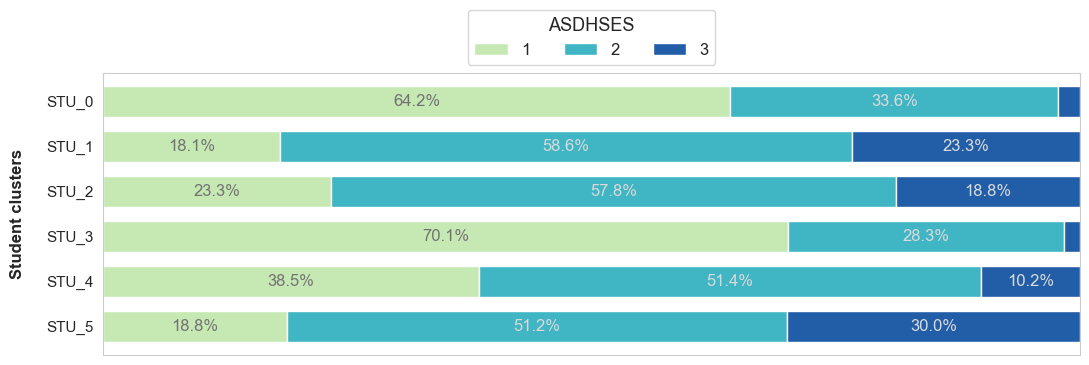

In [22]:
# 单一原始分类变量在各聚类中的分布
cl.plot_cat_distribution_by_cluster(df_original['ASDHSES'], cat_label='ASDHSES', cluster_label='Student clusters')
# output_path=os.path.join("img_MAC", "单一原始分类变量在各聚类中的分布clustering_cat_comparison.jpg"))
print("已完成单一原始分类变量在各聚类中的分布的生成。")

In [23]:
# ITSEX	Sex of Students	学生性别  1: Girl; 2: Boy
cl.describe_clusters_cat(df_original['ITSEX'], cat_name='ITSEX', normalize=True)

ITSEX         1      2
Clusters              
STU_0    0.5067 0.4933
STU_1    0.5023 0.4977
STU_2    0.5784 0.4216
STU_3    0.5568 0.4432
STU_4    0.4949 0.5051
STU_5    0.4855 0.5145

内部变量：降维之后的变量dim

外部变量：原始变量

### 3.2. Cluster means vs global means comparison 聚类均值与全局均值的比较

#### 3.2.1. Internal variables 内部变量

In [24]:
# 比较聚类均值与全局均值的差异。
cl.compare_cluster_means_to_global_means()

cl.compare_cluster_means_to_global_means().to_csv('data_HKG/data_香港_modified_比较聚类内均值与全局均值的差异——降维.csv', index=False)
print("已完成，比较聚类内均值与全局均值的差异——降维，结果保存。")

已完成，比较聚类内均值与全局均值的差异——降维，结果保存。


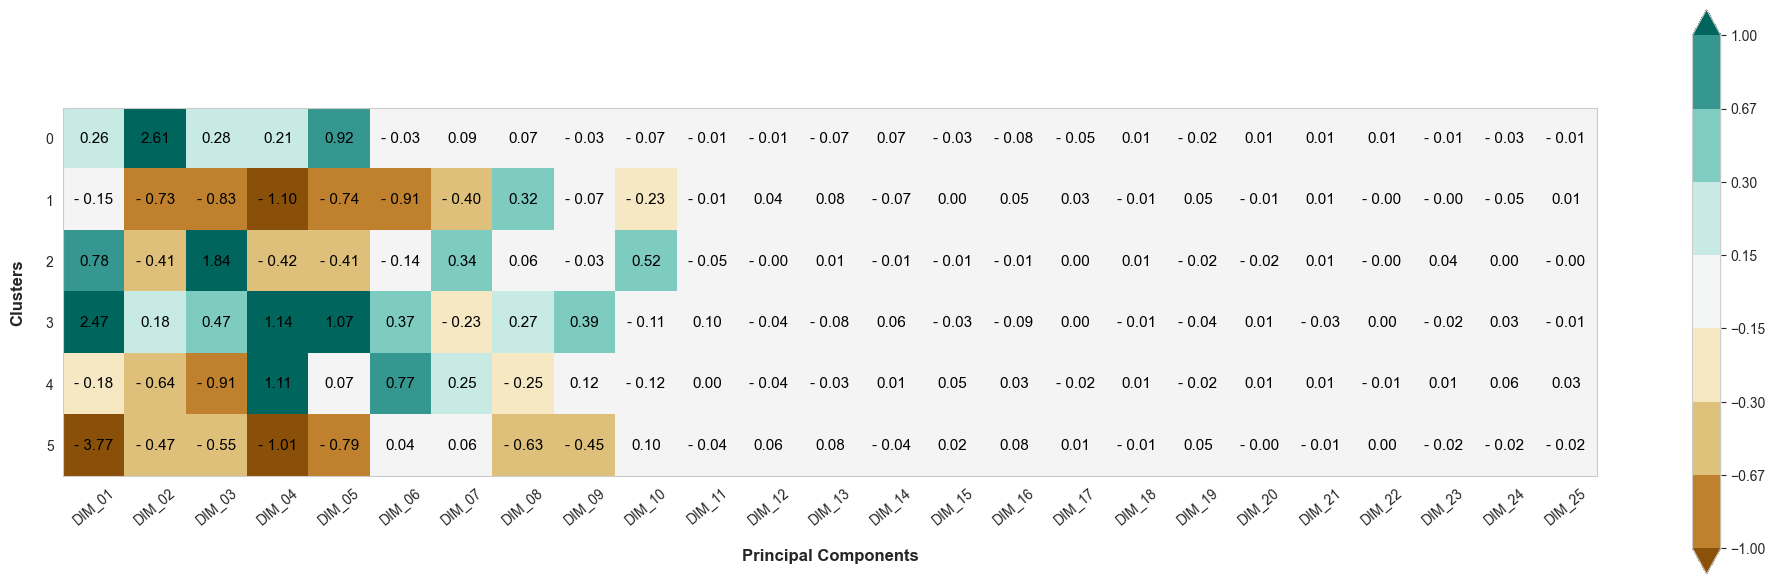

In [25]:
# 比较聚类均值与全局均值的差异，并可视化。
# Principal Components 主成分
# Clusters 聚类（簇）
cl.plot_cluster_means_to_global_means_comparison(xlabel='Principal Components', ylabel='Clusters', 
                                                 levels=[-1, -0.67, -0.3, -0.15, 0.15, 0.3, 0.67, 1])

#### 3.2.2. External variables 外部变量

Note that for external variables we normalize variables to the 0-1 scale in order to make fair comparisons.

注意，对于外部变量，我们将变量标准化到0-1范围内，以便进行公平的比较。


In [26]:
mms = MinMaxScaler()

In [27]:
# 对外部变量进行标准化后，比较聚类均值与全局均值。
cl.compare_cluster_means_to_global_means(pd.DataFrame(mms.fit_transform(df_original[num_vars_sel]), columns=num_vars_sel))
cl.compare_cluster_means_to_global_means().to_csv('data_HKG/data_香港_modified_比较聚类内均值与全局均值的差异.csv', index=False)
print("已完成，比较聚类内均值与全局均值的差异，结果保存。")

已完成，比较聚类内均值与全局均值的差异，结果保存。


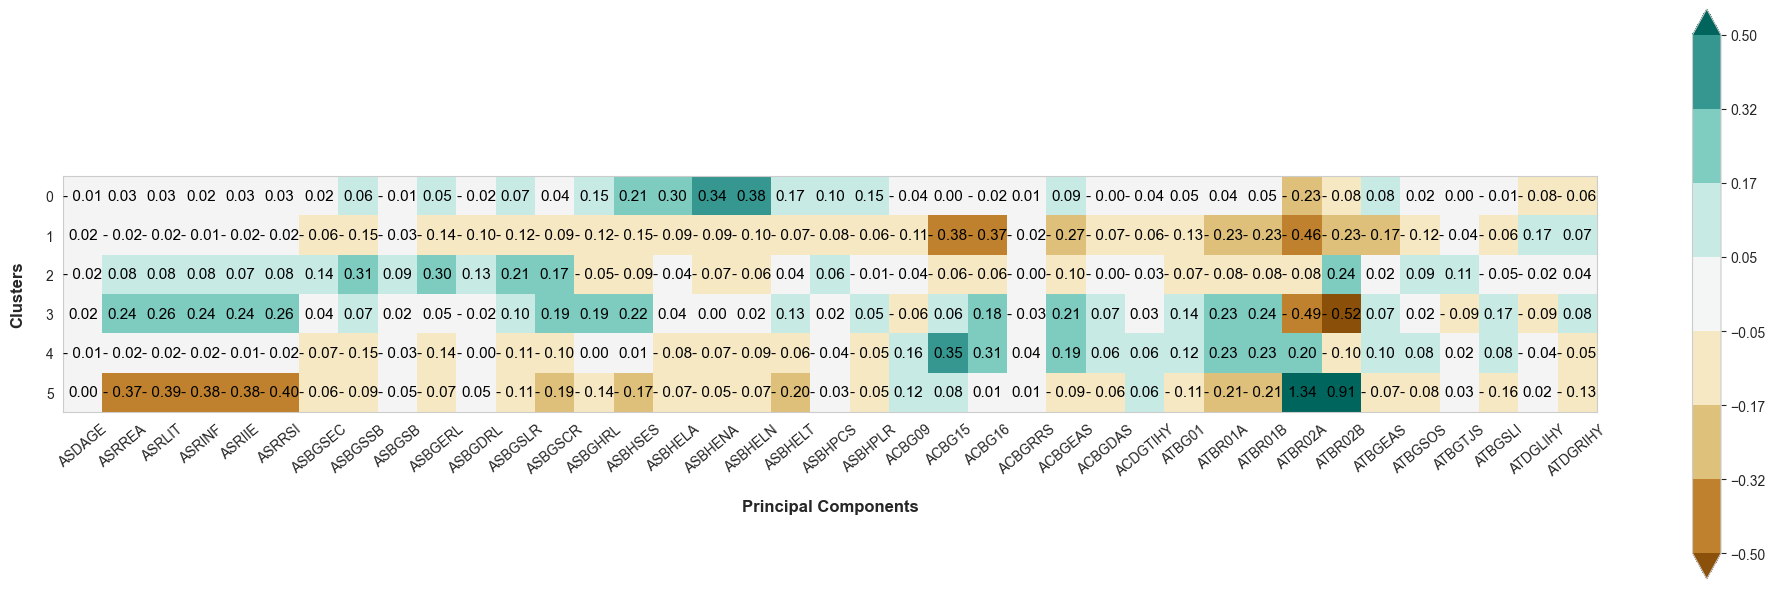

In [28]:
# Principal Components 主成分
# Clusters 聚类（簇）
# 对外部变量（筛选出来的数值变量）比较聚类均值与全局均值。
cl.plot_cluster_means_to_global_means_comparison(df_original=pd.DataFrame(mms.fit_transform(df_original[num_vars_sel]), columns=num_vars_sel), 
                                                 xlabel='Principal Components', ylabel='Clusters', use_weights=True)

### 3.3. Significance tests 显著性测试

In [29]:
# ANOVA tests for internal variables 内部变量的 ANOVA 测试
# 对内部变量进行 ANOVA 测试，分析聚类之间的显著性差异。
cl.anova_tests(cluster_filter=[1, 2], vars_test=['dim_01', 'dim_05', 'dim_08'])

var_name     df   sum_sq  mean_sq        F  PR(>F)
0   dim_01 1.0000 243.9854 243.9854 144.4033  0.0000
1   dim_05 1.0000  31.7107  31.7107  19.1173  0.0000
2   dim_08 1.0000  19.9060  19.9060  14.7457  0.0001

In [30]:
cl.anova_tests(cluster_filter=[1, 2], vars_test=['dim_02', 'dim_03'])

var_name     df    sum_sq   mean_sq         F  PR(>F)
0   dim_02 1.0000   31.0383   31.0383   19.2678  0.0000
1   dim_03 1.0000 2053.1066 2053.1066 1790.7895  0.0000

In [31]:
# ANOVA tests for External variables
# ANOVA测试（方差分析）用于外部变量
# ATBR10G：阅读\发展策略\概括
# ATBR09D：阅读\多久鼓励\发展理解

cl.anova_tests(cluster_filter=[1, 2], df_test=df_original[['ATBR10G', 'ATBR09D']])

var_name     df  sum_sq  mean_sq       F  PR(>F)
0  ATBR10G 1.0000  0.7115   0.7115  1.4824  0.2237
1  ATBR09D 1.0000  7.5088   7.5088 13.5296  0.0002

In [32]:
# 分类变量
# 性别
cl.chi2_test(df_original['ITSEX'])

{'chi2': np.float64(14.746183954958665),
 'p': np.float64(0.011503734831055606),
 'dof': 5}

In [33]:
# 分类变量
# 阅读基准
cl.chi2_test(df_original['ASRIBM'])

{'chi2': np.float64(2754.111539197972), 'p': np.float64(0.0), 'dof': 20}

In [34]:
# ATDGEAS 学校强调学术成功-教师/指数
cl.chi2_test(df_original['ATDGEAS'])

{'chi2': np.float64(276.95313943376294),
 'p': np.float64(1.14371786622547e-53),
 'dof': 10}

### 3.4. Distribution comparisons (visualizations) for numerical variables
数值变量的分布比较（可视化）


#### 3.4.1. Internal variables 内部变量

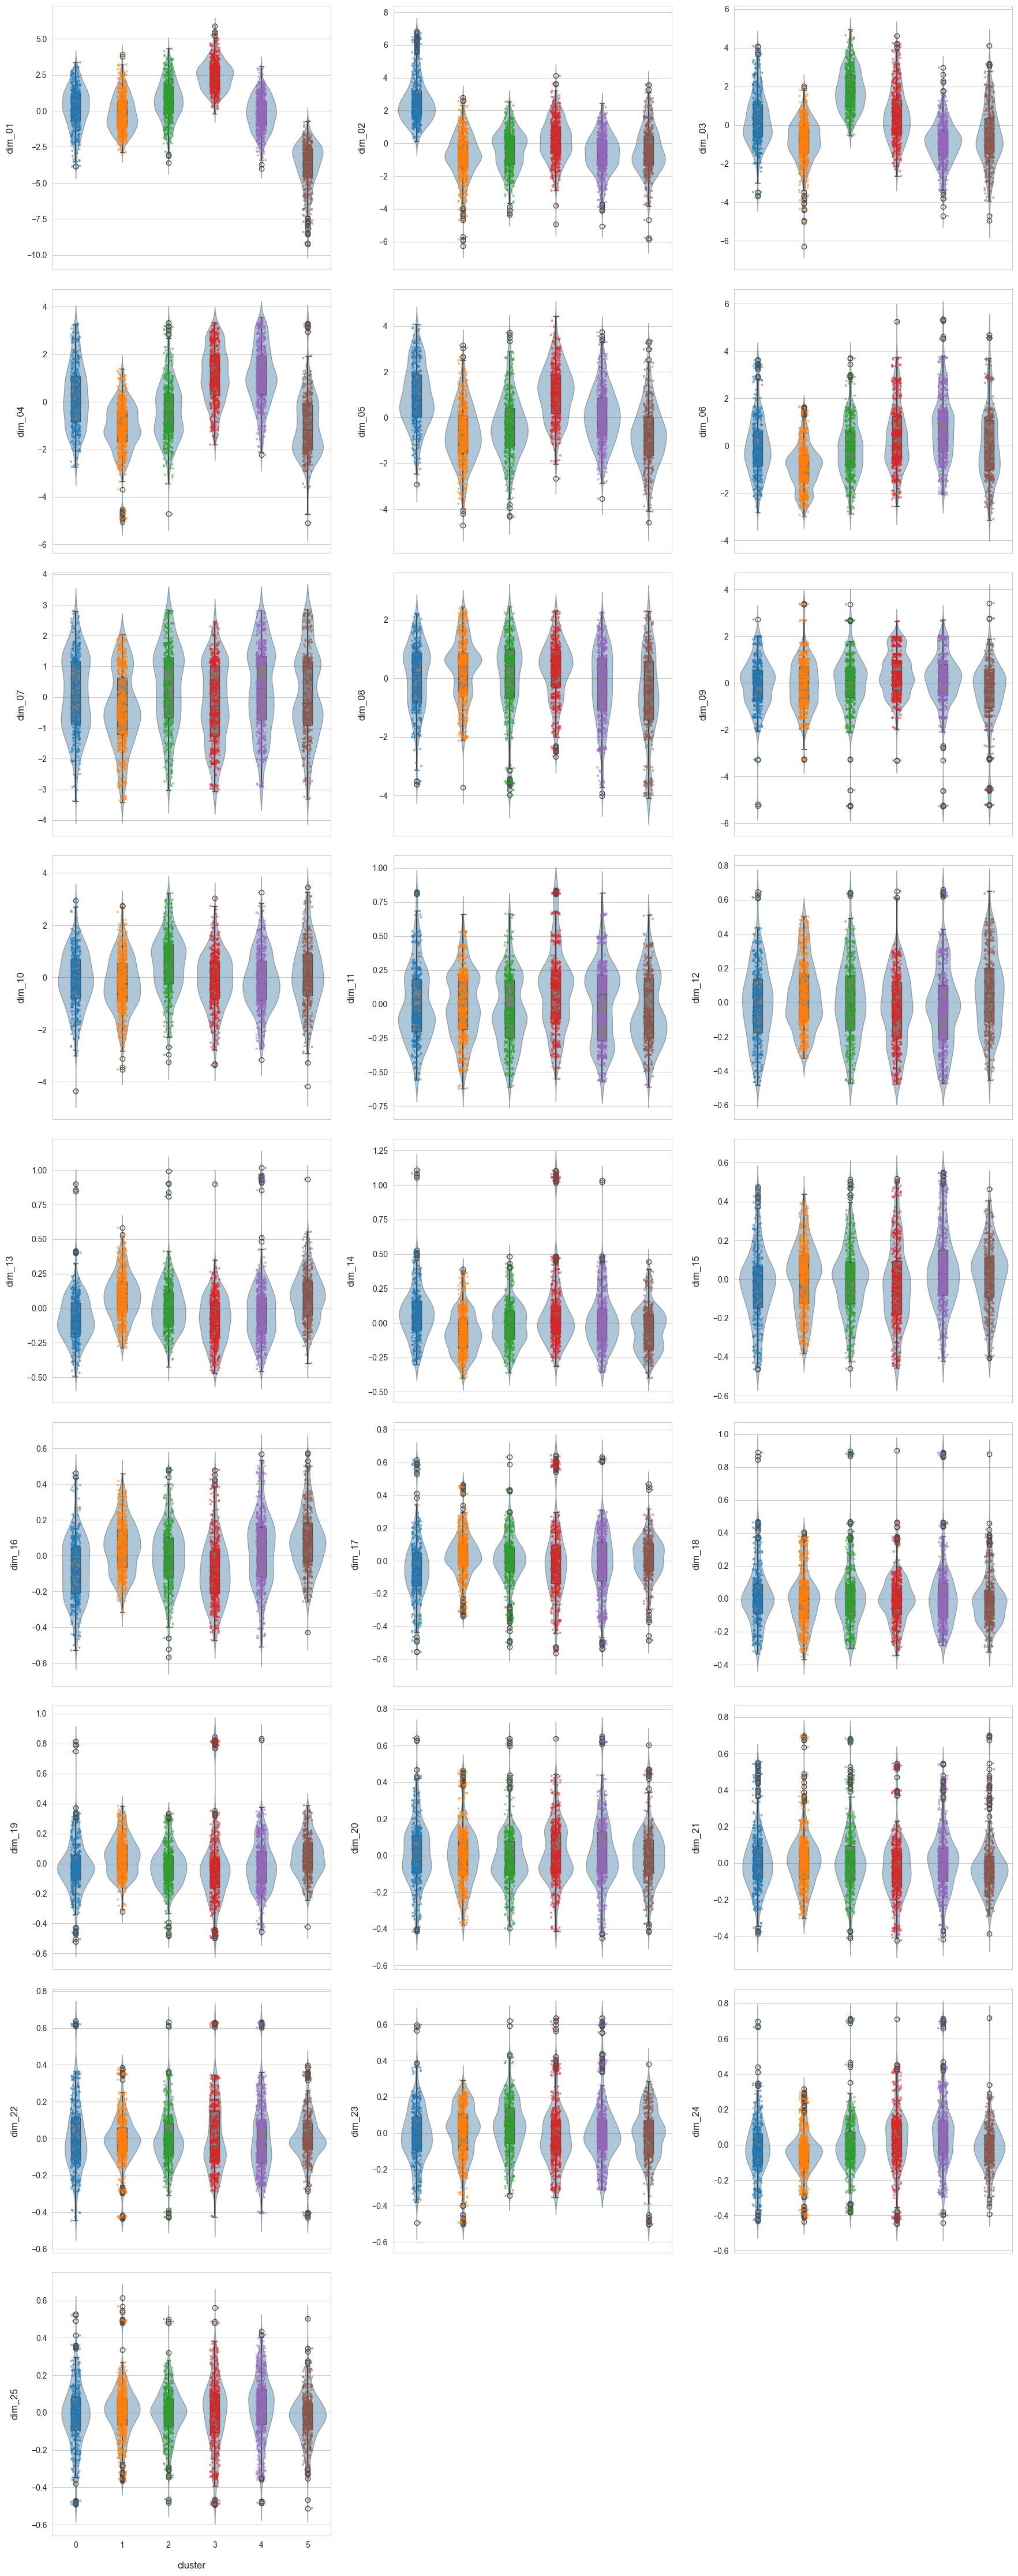

In [35]:
# Internal variables 内部变量 
# 比较降维后数值变量在各聚类中的分布的生成
cl.plot_distribution_comparison_by_cluster()

#### 3.4.2. External variables 外部变量

已完成部分比较原始数值变量在各聚类中的分布的生成。


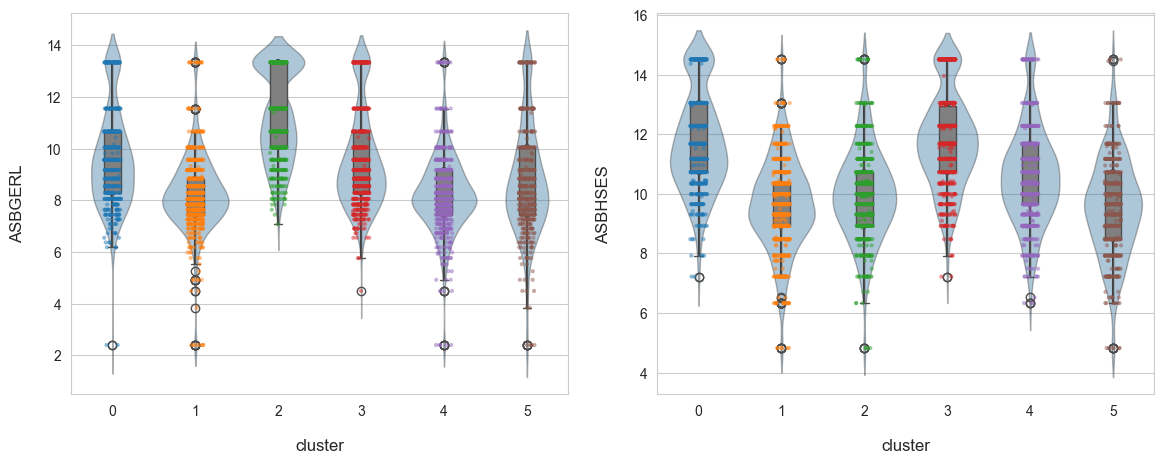

In [36]:
# External variables 外部变量
# ASBGERL	STUDENTS ENGAGED IN READING LESSONS/SCL	学生参与阅读课程/量表
# ASBHSES	HOME SOCIOECONOMIC STATUS/SCL	家庭社会经济地位/量表
# 比较部分原始数值变量在各聚类中的分布
cl.plot_distribution_comparison_by_cluster(df_ext=df_original[['ASBGERL', 'ASBHSES']])
                                        #    output_path=os.path.join("img_MAC", "部分_比较原始数值变量在各聚类中的分布clustering_distribution_comparison.jpg"))
print("已完成部分比较原始数值变量在各聚类中的分布的生成。")
# cl.plot_distribution_comparison_by_cluster(df_ext=df_original[['ATBR10G', 'ATBR09D']])

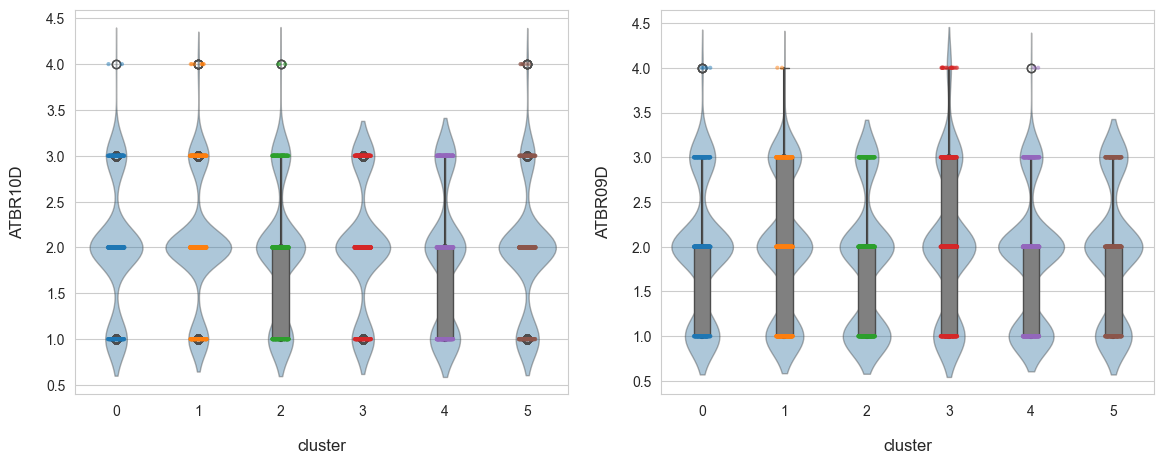

In [37]:
# External variables 外部变量
cl.plot_distribution_comparison_by_cluster(df_ext=df_original[['ATBR10D', 'ATBR09D']])

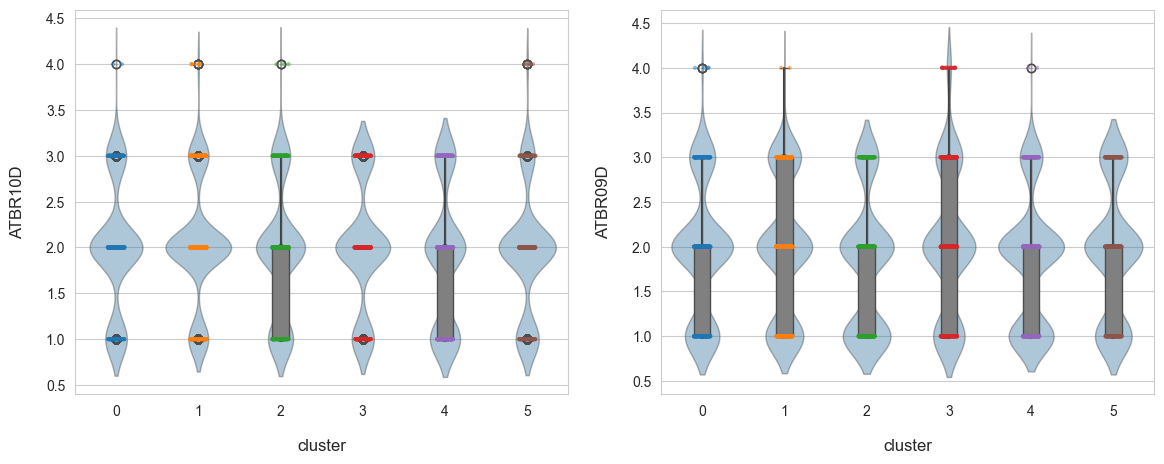

In [38]:
cl.plot_distribution_comparison_by_cluster(df_ext=df_original[['ATBR10D', 'ATBR09D']]) #, output_path='PATH.jpg')

### 3.5. 2-Dimensional plots for numerical variables 2D 数值变量的可视化

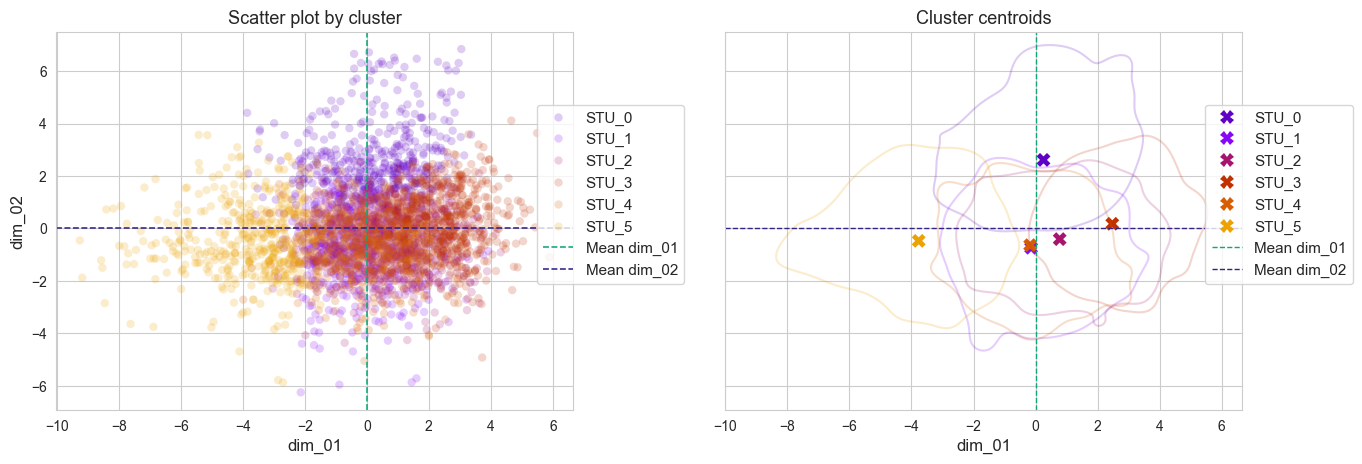

In [39]:
# Internal variables 内部变量
cl.plot_clusters_2D('dim_01', 'dim_02', style_kwargs=dict(kdeplot=True, alpha=0.2)) #, output_path='PATH.jpg')

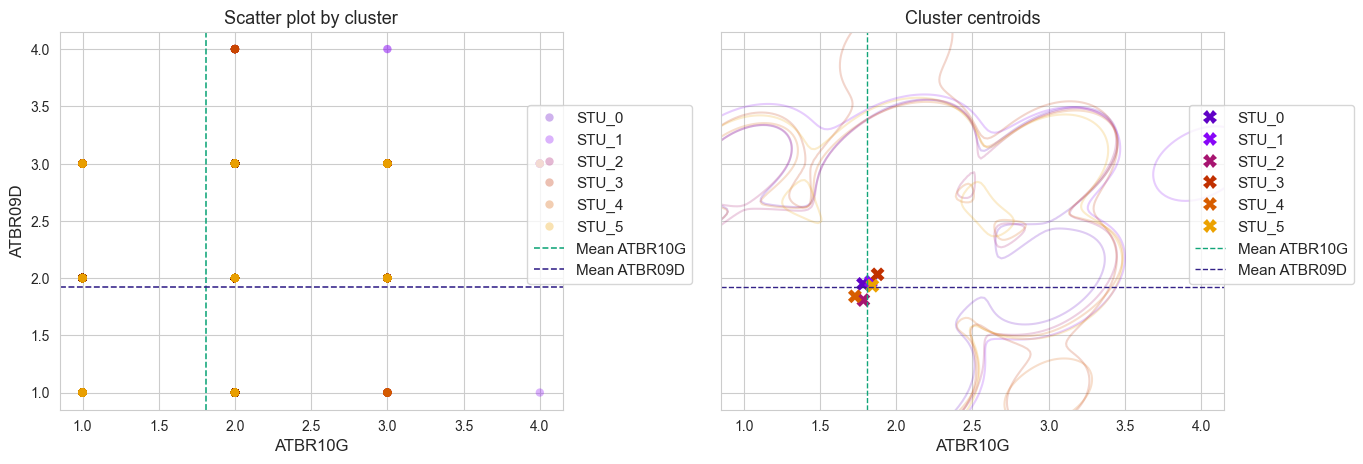

In [40]:
#External Variables 外部变量
# ATBR10G：阅读\发展策略\概括
# ATBR09D：阅读\多久鼓励\发展理解
cl.plot_clusters_2D(df_original['ATBR10G'], df_original['ATBR09D'])

### 3.6. Distribution comparisons (visualization) for categorical variables 

分类变量的分布比较（可视化）

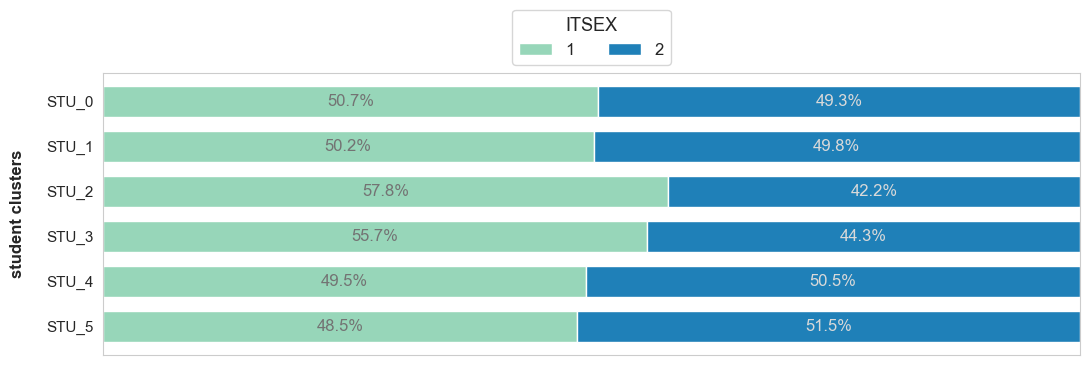

In [41]:
# 分类变量的分布可视化
cl.plot_cat_distribution_by_cluster(df_original['ITSEX'], cat_label='ITSEX', cluster_label='student clusters')

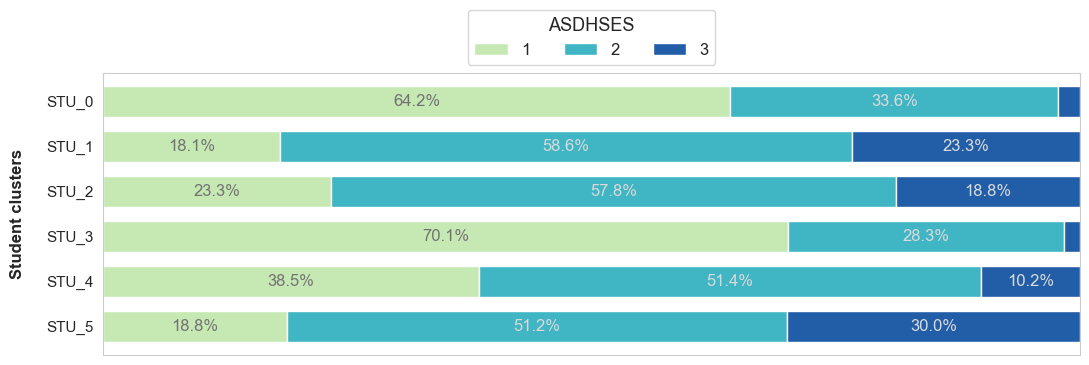

In [42]:
# ASDHSES	HOME SOCIOECONOMIC STATUS/IDX	家庭社会经济地位/指数
cl.plot_cat_distribution_by_cluster(df_original['ASDHSES'], cat_label='ASDHSES', cluster_label='Student clusters')

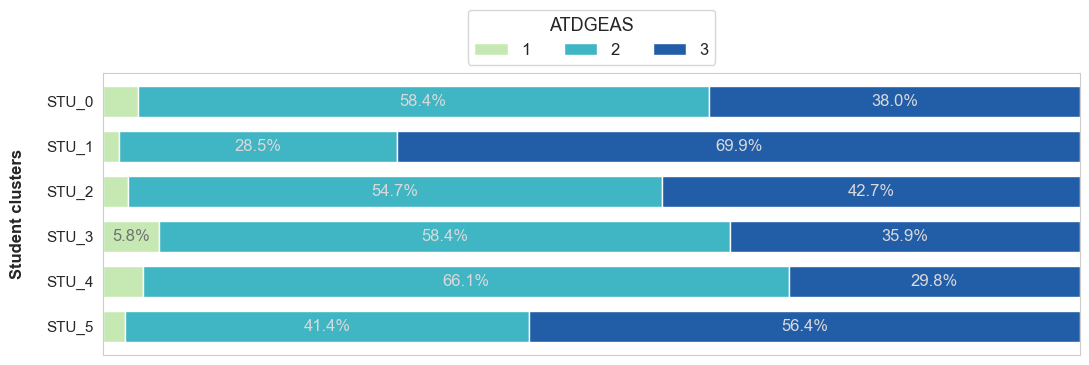

In [43]:
# ATDGEAS 学校强调学术成功-教师/指数
cl.plot_cat_distribution_by_cluster(df_original['ATDGEAS'], cat_label='ATDGEAS', cluster_label='Student clusters')

## Export results 导出结果

Export results: 导出结果
- One data set with the clusters associated to the extracted components;
- 一个数据集，其中包含与提取的成分相关的聚类。

- Another one with the clusters associated to the original data.
- 另一个数据集，其中包含与原始数据相关的聚类。


In [44]:
cl.df.to_csv('data_HKG/data_香港_modified_preprocessed_dim_red_clustered_output.csv', index=False)

In [45]:
# 一次性添加两列
new_columns = pd.DataFrame({
    "cluster": cl.df["cluster"].values,
    "cluster_cat": cl.df["cluster_cat"].values
})
df_original = pd.concat([df_original, new_columns], axis=1)

# df_original['cluster'] = cl.df['cluster'].values
# df_original['cluster_cat'] = cl.df['cluster_cat'].values
df_original.to_csv('data_HKG/data_香港_modified_preprocessed_clustered_output.csv', index=False)

## Reproducibility 可重复性

In [46]:
df_ref = pd.read_csv('data_HKG/data_香港_modified_preprocessed_dim_red_clustered_output.csv')

print('Diff', (df_ref['cluster'] != cl.df['cluster']).sum())

Diff 0
